**Trained with resnet50 architectire without transfer learning**
1. used total dataset of 62 classes


In [50]:
!pip install fastai wwf -q --upgrade

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [3]:
path = Path('/content/drive/MyDrive/iiit delhi/train1')

**Augmentation used**
1. Flipping  = False
2. max_rotate = to rotate image up to 10degrees
3. zoom image using min_zoom and max_zoom values
4. max_lightning = applying lightining of probablity 0.2
5. pad_mode = applying padding (reflection of the image)
  

In [4]:
np.random.seed(6)

dataset = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    #loading all images
                  get_items = get_image_files,
                  # dividing the dataset randomly into train=80% val=20%
                  splitter = RandomSplitter(),
                  # getting label from folder name
                  get_y = parent_label,
                  #transforming image size = 64
                  item_tfms=Resize(64),
                  #applying augmentation
                  batch_tfms=aug_transforms(do_flip=False, flip_vert=False, max_rotate=10.0, min_zoom=1.0,
                                            max_zoom=1.1, max_lighting=0.2, max_warp=0.2, 
                                            p_affine=0.75, p_lighting=0.75,pad_mode='reflection', min_scale=1.0))

loading dataset into dataloaders

In [5]:
dls = dataset.dataloaders(path)

visualizing dataset

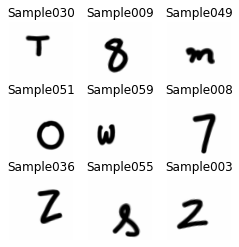

In [6]:
dls.show_batch(max_n=9, figsize=(4,4))

Finding learning rate using lr_find() function
- optimizer = Adam

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=9.999999747378752e-06)

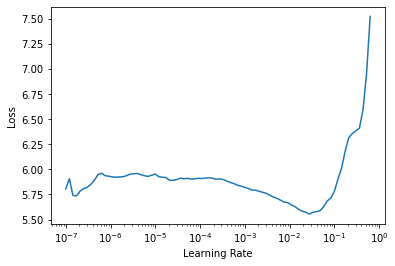

In [8]:
#loading resnet34 dataset with pretrained weights=False
learn = cnn_learner(dls, resnet34,pretrained=False, metrics=[error_rate,accuracy])
#finding learning rate
learn.lr_find()


In [12]:
learn.fit(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.236520,2.114473,0.512097,0.487903,00:32
1,2.053609,1.607079,0.443548,0.556452,00:32
2,1.925180,1.821150,0.459677,0.540323,00:32
3,1.925891,2.964804,0.538306,0.461694,00:32
4,1.837877,1.404500,0.407258,0.592742,00:32
5,1.754866,2.026500,0.381048,0.618952,00:32
6,1.686987,1.698200,0.419355,0.580645,00:32
7,1.609727,1.849078,0.493952,0.506048,00:32
8,1.582057,1.410993,0.441532,0.558468,00:32
9,1.547807,1.427030,0.336694,0.663306,00:32


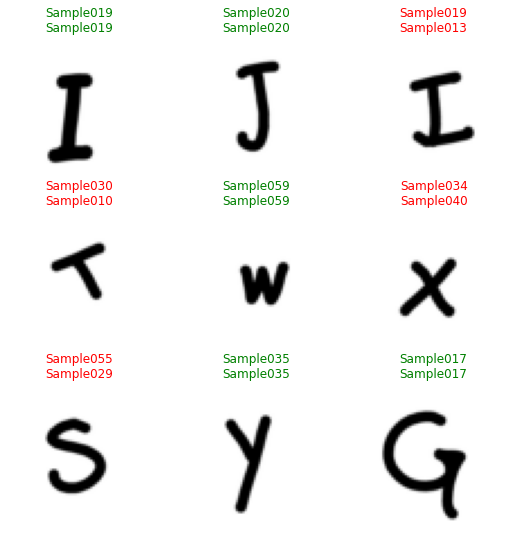

In [14]:
learn.show_results()

In [13]:
learn.save('model1.h5')

Path('models/model1.h5.pth')

Plotting confusion matrix

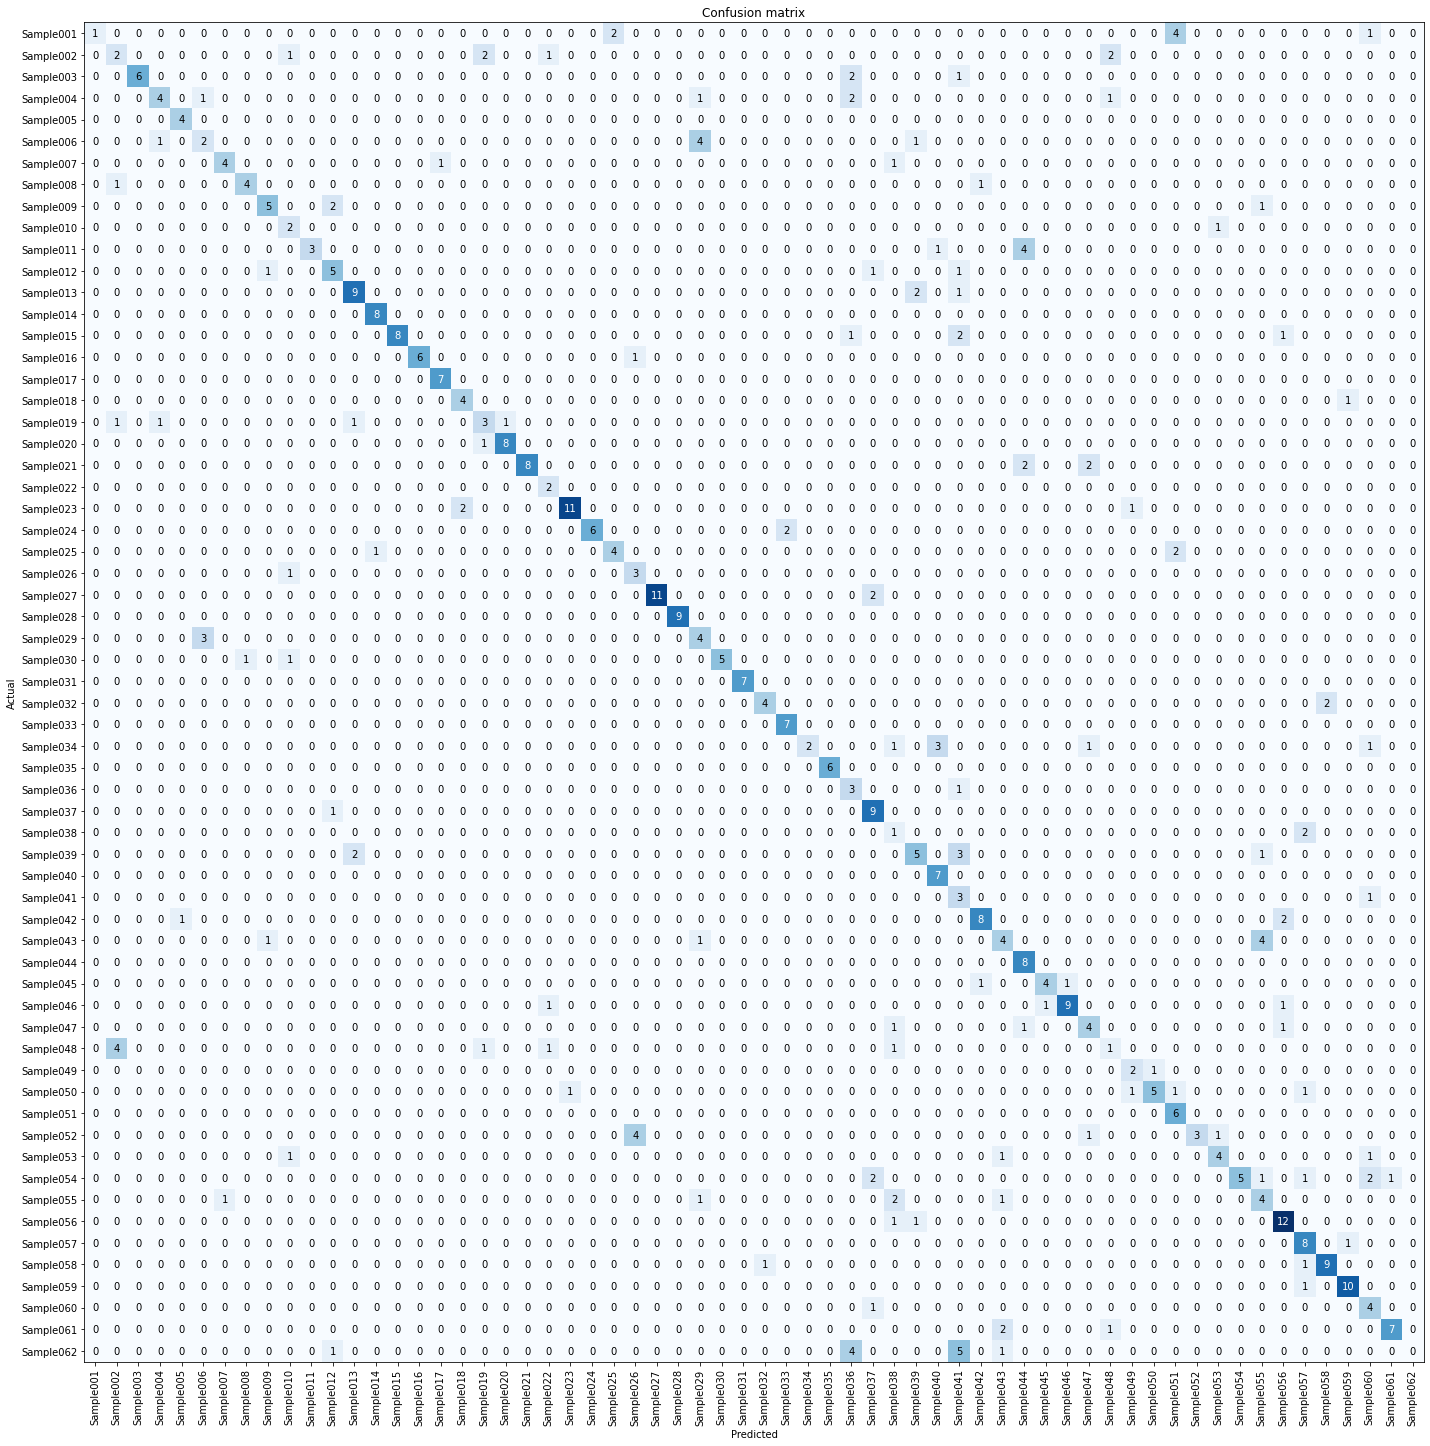

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(20,20))